# Class Competition - Group 10

# Who survived the sinking of the Titanic?

The goal of this competition is to predict who survived the Titanic sinking in 1912.

In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
%matplotlib inline

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("Titanic_0.csv")

In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
5,6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
6,7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
7,8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
8,9,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
9,10,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.shape

(713, 12)

## Data set description

<ul>
<li><b>Survived</b>: binary attribute that indicates whether the passenger survived. This is the dependent variable that we will attempt to explain
<li><b>Pclass</b>: Ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
<li><b>Age</b>: Passenger age
<li><b>SibSp</b>: The amout of the passenger's siblings/spouses aboard the Titanic
<li><b>Parch</b>: The amout of the passenger's parents/children aboard the Titanic
<li><b>Fare</b>: The ticket fare
<li><b>Male</b>: binary attibute that indicates the gender (1=Male, 0=Female)
<li><b>Embarked_C</b>: binary attibute that indicates whether the passenger embarked in Cherbourg
<li><b>Embarked_Q</b>: binary attibute that indicates whether the passenger embarked in Queenstown
<li><b>Embarked_S</b>: binary attibute that indicates whether the passenger embarked in Southampton
</ul>

## Instruction

Cleaning the data set if necessary. 

Use everything you know to find a machine learning model to achieve the highest possible AUC score. Two testing sets have been reserved: TestA.csv and TestB.csv. Your model will be evaluated using these two sets. 70% of the grade will be based on the AUC score on TestA.csv. 30% of the grade will be based on the ranking of the AUC score on TestB.csv among the groups. To be specific, your grade on TestA.csv will be equal to the final AUC score multiplied by 70, and your grade on TestB.csv will be equal to 30 * (number of groups - your ranking)/(number of groups - 1). You must submit the same model for both sets with clear explanation of your codes. You must include the codes to evaluate your model on TestA.csv and TestB.csv. Failure to do so will result in 20% loss of grades (10% for each test). 

TestB.csv is private, which means you will never see it. The ranking will be revealed only after the deadline. TestA.csv is semi-private. This means that you have at most one chance everyday for me to check your model performance on TestA.csv using your code, and I will let you know the AUC score and post your score on the discussion board. I will save your notebook file in the same folder with the data files. If your code does not work on my computer, you lose the opportunity on the same day. 

### Data Cleaning

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            141
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          549
Embarked         1
dtype: int64

In [11]:
df.drop(columns=['Name','Ticket','PassengerId'],inplace=True)

In [12]:
df['Cabin_Level'] = df['Cabin'].astype(str).str.upper().str.get(0)

In [13]:
df['Relatives'] = df.SibSp + df.Parch

In [14]:
df = pd.get_dummies(df,columns=['Sex','Embarked','Pclass','Cabin_Level'])

In [15]:
df.isna().sum()

Survived           0
Age              141
SibSp              0
Parch              0
Fare               0
Cabin            549
Relatives          0
Sex_female         0
Sex_male           0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
Pclass_1           0
Pclass_2           0
Pclass_3           0
Cabin_Level_A      0
Cabin_Level_B      0
Cabin_Level_C      0
Cabin_Level_D      0
Cabin_Level_E      0
Cabin_Level_F      0
Cabin_Level_G      0
Cabin_Level_N      0
dtype: int64

In [16]:
df.drop(columns=['Cabin','SibSp','Parch'],inplace=True)

In [17]:
#df.Fare.replace(to_replace = 0,value = df.Fare.median, inplace=True)

In [18]:
df.Age.mean()
df.Age.median()

29.81148601398601

28.0

In [19]:
df.Age.fillna(value=df.Age.median(),inplace=True)

In [20]:
df.head()

,Survived,Age,Fare,Relatives,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Cabin_Level_A,Cabin_Level_B,Cabin_Level_C,Cabin_Level_D,Cabin_Level_E,Cabin_Level_F,Cabin_Level_G,Cabin_Level_N
0,0,22.0,7.2500,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,26.0,7.9250,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
4,0,28.0,8.4583,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [21]:
np.set_printoptions(precision=6, suppress=True)

In [22]:
X = df.drop(columns = 'Survived')
y = df.Survived

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 0)

In [24]:
preprocessor = make_pipeline(StandardScaler(), SimpleImputer())

### Logistic Regression (without scaling)


In [25]:
pipe_lr = Pipeline([('preprocessing', preprocessor),\
                    ('classifier', LogisticRegression(random_state = 0, multi_class = 'auto'))])

In [26]:
pipe_lr.get_params()

{'memory': None,
 'steps': [('preprocessing',
   Pipeline(steps=[('standardscaler', StandardScaler()),
                   ('simpleimputer', SimpleImputer())])),
  ('classifier', LogisticRegression(random_state=0))],
 'verbose': False,
 'preprocessing': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('simpleimputer', SimpleImputer())]),
 'classifier': LogisticRegression(random_state=0),
 'preprocessing__memory': None,
 'preprocessing__steps': [('standardscaler', StandardScaler()),
  ('simpleimputer', SimpleImputer())],
 'preprocessing__verbose': False,
 'preprocessing__standardscaler': StandardScaler(),
 'preprocessing__simpleimputer': SimpleImputer(),
 'preprocessing__standardscaler__copy': True,
 'preprocessing__standardscaler__with_mean': True,
 'preprocessing__standardscaler__with_std': True,
 'preprocessing__simpleimputer__add_indicator': False,
 'preprocessing__simpleimputer__copy': True,
 'preprocessing__simpleimputer__fill_value': None,
 'preprocessing__s

In [27]:
param_grid = {'classifier__max_iter': [50, 100, 500, 1000, 10000],\
              'classifier__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10],\
              'classifier__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],\
              'classifier__penalty' : ['l1', 'l2','none']}
grid_lr = GridSearchCV(pipe_lr, param_grid = param_grid, cv = 5, n_jobs = -1, return_train_score = True,scoring='roc_auc')
grid_lr.fit(X_train, y_train)

grid_lr.best_params_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('standardscaler',
                                                         StandardScaler()),
                                                        ('simpleimputer',
                                                         SimpleImputer())])),
                                       ('classifier',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10],
                         'classifier__max_iter': [50, 100, 500, 1000, 10000],
                         'classifier__penalty': ['l1', 'l2', 'none'],
                         'classifier__solver': ['newton-cg', 'lbfgs',
                                                'liblinear', 'sag', 'saga']},
             return_train_score=True, scoring='roc_auc')

{'classifier__C': 0.05,
 'classifier__max_iter': 50,
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear'}

In [28]:
accuracy = grid_lr.score(X_test, y_test)
print("Best cross-validation score: {:.3f}".format(grid_lr.best_score_))
print('Accuracy score of the {} is {:.3f}'.format(grid_lr.__class__.__name__, accuracy))

Best cross-validation score: 0.865
Accuracy score of the GridSearchCV is 0.892


In [29]:
from sklearn.metrics import roc_auc_score
y_proba_lr = grid_lr.fit(X_train, y_train).predict_proba(X_test)

y_score_lr = grid_lr.predict_proba(X_test)
roc_auc_score(y_test, y_proba_lr[:,1])

0.8920454545454545

### K-Nearest Neighbors

In [30]:
pipe_knn = Pipeline([('preprocessing', preprocessor),('classifier', KNeighborsClassifier())])

In [31]:
pipe_knn.get_params()

{'memory': None,
 'steps': [('preprocessing',
   Pipeline(steps=[('standardscaler', StandardScaler()),
                   ('simpleimputer', SimpleImputer())])),
  ('classifier', KNeighborsClassifier())],
 'verbose': False,
 'preprocessing': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('simpleimputer', SimpleImputer())]),
 'classifier': KNeighborsClassifier(),
 'preprocessing__memory': None,
 'preprocessing__steps': [('standardscaler', StandardScaler()),
  ('simpleimputer', SimpleImputer())],
 'preprocessing__verbose': False,
 'preprocessing__standardscaler': StandardScaler(),
 'preprocessing__simpleimputer': SimpleImputer(),
 'preprocessing__standardscaler__copy': True,
 'preprocessing__standardscaler__with_mean': True,
 'preprocessing__standardscaler__with_std': True,
 'preprocessing__simpleimputer__add_indicator': False,
 'preprocessing__simpleimputer__copy': True,
 'preprocessing__simpleimputer__fill_value': None,
 'preprocessing__simpleimputer__missing_va

In [32]:
param_grid_knn = {'classifier__n_neighbors': range(1, 10),\
                  'classifier__weights' : ['uniform','distance'],
                  'classifier__metric' : ['minkowski','euclidean','manhattan']}
grid_knn = GridSearchCV(pipe_knn, param_grid = param_grid_knn, cv = 5, n_jobs = -1, return_train_score = True,scoring='roc_auc')
grid_knn.fit(X_train, y_train)
grid_knn.best_params_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('standardscaler',
                                                         StandardScaler()),
                                                        ('simpleimputer',
                                                         SimpleImputer())])),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__metric': ['minkowski', 'euclidean',
                                                'manhattan'],
                         'classifier__n_neighbors': range(1, 10),
                         'classifier__weights': ['uniform', 'distance']},
             return_train_score=True, scoring='roc_auc')

{'classifier__metric': 'manhattan',
 'classifier__n_neighbors': 9,
 'classifier__weights': 'uniform'}

In [33]:
accuracy = grid_knn.score(X_test, y_test)
print("Best cross-validation score: {:.3f}".format(grid_knn.best_score_))
print('Accuracy score of the {} is {:.3f}'.format(grid_knn.__class__.__name__, accuracy))

Best cross-validation score: 0.839
Accuracy score of the GridSearchCV is 0.865


In [34]:
from sklearn.metrics import roc_auc_score
y_proba_lr = grid_knn.fit(X_train, y_train).predict_proba(X_test)

y_score_lr = grid_knn.predict_proba(X_test)
roc_auc_score(y_test, y_proba_lr[:,1])

0.8648538961038961

### Linear Support Vector

In [35]:
pipe_svc = Pipeline([('preprocessing', preprocessor),('classifier', LinearSVC(random_state = 0))])

In [36]:
pipe_svc.get_params()

{'memory': None,
 'steps': [('preprocessing',
   Pipeline(steps=[('standardscaler', StandardScaler()),
                   ('simpleimputer', SimpleImputer())])),
  ('classifier', LinearSVC(random_state=0))],
 'verbose': False,
 'preprocessing': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('simpleimputer', SimpleImputer())]),
 'classifier': LinearSVC(random_state=0),
 'preprocessing__memory': None,
 'preprocessing__steps': [('standardscaler', StandardScaler()),
  ('simpleimputer', SimpleImputer())],
 'preprocessing__verbose': False,
 'preprocessing__standardscaler': StandardScaler(),
 'preprocessing__simpleimputer': SimpleImputer(),
 'preprocessing__standardscaler__copy': True,
 'preprocessing__standardscaler__with_mean': True,
 'preprocessing__standardscaler__with_std': True,
 'preprocessing__simpleimputer__add_indicator': False,
 'preprocessing__simpleimputer__copy': True,
 'preprocessing__simpleimputer__fill_value': None,
 'preprocessing__simpleimputer__miss

In [37]:
param_grid = {'classifier__max_iter': [50, 100, 1000, 10000, 100000],\
              'classifier__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10],\
              'classifier__penalty': ['l1','l2','none']}
grid_svc = GridSearchCV(pipe_svc, param_grid = param_grid, cv = 5, n_jobs = -1, return_train_score = True,scoring='roc_auc')
grid_svc.fit(X_train, y_train)
grid_svc.best_params_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('standardscaler',
                                                         StandardScaler()),
                                                        ('simpleimputer',
                                                         SimpleImputer())])),
                                       ('classifier',
                                        LinearSVC(random_state=0))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0,
                                           10],
                         'classifier__max_iter': [50, 100, 1000, 10000, 100000],
                         'classifier__penalty': ['l1', 'l2', 'none']},
             return_train_score=True, scoring='roc_auc')

{'classifier__C': 0.01,
 'classifier__max_iter': 50,
 'classifier__penalty': 'l2'}

In [38]:
accuracy = grid_svc.score(X_test, y_test)
print("Best cross-validation score: {:.3f}".format(grid_svc.best_score_))
print('Accuracy score of the {} is {:.3f}'.format(grid_svc.__class__.__name__, accuracy))

Best cross-validation score: 0.864
Accuracy score of the GridSearchCV is 0.878


In [39]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

y_pred_train = grid_svc.predict(X_train)
y_score = grid_svc.predict(X_test)

roc_auc_score(y_test, y_score)

0.8311688311688311

### Support Vector Machine (Kernelized) 

In [40]:
pipe_svm = Pipeline([('preprocessing', preprocessor),('classifier', SVC())])

In [41]:
pipe_svm.get_params()

{'memory': None,
 'steps': [('preprocessing',
   Pipeline(steps=[('standardscaler', StandardScaler()),
                   ('simpleimputer', SimpleImputer())])),
  ('classifier', SVC())],
 'verbose': False,
 'preprocessing': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('simpleimputer', SimpleImputer())]),
 'classifier': SVC(),
 'preprocessing__memory': None,
 'preprocessing__steps': [('standardscaler', StandardScaler()),
  ('simpleimputer', SimpleImputer())],
 'preprocessing__verbose': False,
 'preprocessing__standardscaler': StandardScaler(),
 'preprocessing__simpleimputer': SimpleImputer(),
 'preprocessing__standardscaler__copy': True,
 'preprocessing__standardscaler__with_mean': True,
 'preprocessing__standardscaler__with_std': True,
 'preprocessing__simpleimputer__add_indicator': False,
 'preprocessing__simpleimputer__copy': True,
 'preprocessing__simpleimputer__fill_value': None,
 'preprocessing__simpleimputer__missing_values': nan,
 'preprocessing__simpl

In [42]:
param_grid = {'classifier__C': np.logspace(-3, 3, 7),
              'classifier__gamma': np.logspace(-3, 3, 7) / X_train.shape[0],
              'classifier__kernel': ['rbf','sigmoid']}
grid_svm = GridSearchCV(pipe_svm, param_grid = param_grid, cv = 5, n_jobs = -1, return_train_score = True,scoring='roc_auc')
grid_svm.fit(X_train, y_train)

grid_svm.best_params_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('standardscaler',
                                                         StandardScaler()),
                                                        ('simpleimputer',
                                                         SimpleImputer())])),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ,
       1000.   ]),
                         'classifier__gamma': array([0.000002, 0.000016, 0.000156, 0.00156 , 0.015601, 0.156006,
       1.560062]),
                         'classifier__kernel': ['rbf', 'sigmoid']},
             return_train_score=True, scoring='roc_auc')

{'classifier__C': 1.0,
 'classifier__gamma': 0.0015600624024961,
 'classifier__kernel': 'sigmoid'}

In [43]:
accuracy = grid_svm.score(X_test, y_test)
print("Best cross-validation score: {:.3f}".format(grid_svm.best_score_))
print('Accuracy score of the {} is {:.3f}'.format(grid_svm.__class__.__name__, accuracy))

Best cross-validation score: 0.863
Accuracy score of the GridSearchCV is 0.890


In [44]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

y_pred_train = grid_svm.predict(X_train)
y_score = grid_svm.predict(X_test)

roc_auc_score(y_test, y_score)

0.8019480519480519

### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree
import graphviz

In [46]:
df_feature_names = X.columns.tolist()

In [47]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=df_feature_names, filled=True)

In [48]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1, 10),'max_leaf_nodes':range(2, 20),'ccp_alpha': np.linspace(0., 0.03, 20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10, return_train_score=True,scoring='roc_auc')
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': array([0.      , 0.001579, 0.003158, 0.004737, 0.006316, 0.007895,
       0.009474, 0.011053, 0.012632, 0.014211, 0.015789, 0.017368,
       0.018947, 0.020526, 0.022105, 0.023684, 0.025263, 0.026842,
       0.028421, 0.03    ]),
                         'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 20)},
             return_train_score=True, scoring='roc_auc')

In [50]:
grid.best_params_

{'ccp_alpha': 0.0, 'max_depth': 3, 'max_leaf_nodes': 7}

<Figure size 3000x900 with 0 Axes>

'no_pruning.png'

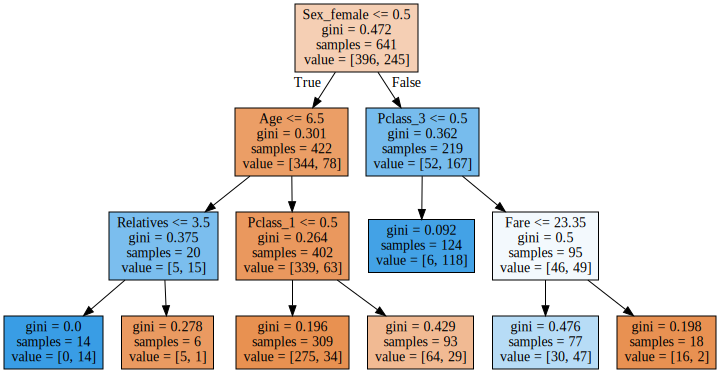

<Figure size 3000x900 with 0 Axes>

In [51]:
plt.figure(figsize=(10, 3), dpi=300)
tree_dot = export_graphviz(grid.best_estimator_, out_file=None, feature_names=df_feature_names, filled=True)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="no_pruning", cleanup=True)
graph

In [52]:
from sklearn.metrics import roc_auc_score
y_proba_grid = grid.fit(X_train, y_train).predict_proba(X_test)

y_score_grid = grid.predict_proba(X_test)
roc_auc_score(y_test, y_proba_grid[:,1])

0.9139610389610389

### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [55]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [56]:
rf.score(X_test, y_test)

0.8194444444444444

In [57]:
np.set_printoptions(precision=6, suppress=True)
param_grid = {'max_features': [2,4,6,8,10,12],
              'max_depth': [2,4,6,8,10,12],
              'n_estimators':[10,50,100,200,500]}
param_grid

{'max_features': [2, 4, 6, 8, 10, 12],
 'max_depth': [2, 4, 6, 8, 10, 12],
 'n_estimators': [10, 50, 100, 200, 500]}

In [58]:
grid = GridSearchCV(rf, param_grid=param_grid, cv=5, return_train_score=True, n_jobs=-1,scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_features': [2, 4, 6, 8, 10, 12],
                         'n_estimators': [10, 50, 100, 200, 500]},
             return_train_score=True, scoring='roc_auc')

In [59]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.037820,0.005861,0.007889,0.000611,2,2,10,"{'max_depth': 2, 'max_features': 2, 'n_estimat...",0.791199,0.852622,...,0.832975,0.023172,172,0.867428,0.832445,0.854890,0.816463,0.844702,0.843186,0.017643
1,0.124497,0.008791,0.016183,0.003577,2,2,50,"{'max_depth': 2, 'max_features': 2, 'n_estimat...",0.803699,0.864505,...,0.859345,0.032734,64,0.880231,0.868361,0.868023,0.858567,0.862808,0.867598,0.007278
2,0.237160,0.010601,0.022389,0.001783,2,2,100,"{'max_depth': 2, 'max_features': 2, 'n_estimat...",0.803699,0.867864,...,0.856271,0.029533,82,0.882726,0.869962,0.867580,0.850971,0.878992,0.870046,0.011052
3,0.433581,0.008536,0.040325,0.004381,2,2,200,"{'max_depth': 2, 'max_features': 2, 'n_estimat...",0.804719,0.872772,...,0.859497,0.031342,59,0.877987,0.867653,0.864748,0.853811,0.874911,0.867822,0.008478
4,1.084995,0.030711,0.090221,0.003318,2,2,500,"{'max_depth': 2, 'max_features': 2, 'n_estimat...",0.805102,0.864634,...,0.857972,0.032975,75,0.880675,0.870735,0.864546,0.858937,0.872521,0.869483,0.007371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.029344,0.001096,0.005981,0.000513,12,12,10,"{'max_depth': 12, 'max_features': 12, 'n_estim...",0.757526,0.841126,...,0.822365,0.035362,179,0.995221,0.990214,0.991035,0.990255,0.992170,0.991779,0.001861
176,0.127406,0.003607,0.018605,0.007122,12,12,50,"{'max_depth': 12, 'max_features': 12, 'n_estim...",0.791964,0.845518,...,0.837442,0.031257,166,0.998046,0.996057,0.995896,0.996507,0.996322,0.996566,0.000770
177,0.252745,0.016488,0.020419,0.000650,12,12,100,"{'max_depth': 12, 'max_features': 12, 'n_estim...",0.790051,0.850426,...,0.841968,0.033475,147,0.998385,0.995912,0.995976,0.997167,0.997047,0.996898,0.000909
178,0.484997,0.003561,0.034452,0.001280,12,12,200,"{'max_depth': 12, 'max_features': 12, 'n_estim...",0.793112,0.846164,...,0.840100,0.033141,155,0.998563,0.997119,0.996395,0.998181,0.997723,0.997596,0.000770


In [60]:
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_max_depth', columns='param_max_features')
pd.set_option("display.precision",6)
res = res.set_index(res.index.values.round(6))
res

param_max_features,2,4,6,8,10,12
2,0.853212,0.855013,0.857808,0.857624,0.857139,0.858672
4,0.864713,0.866458,0.865967,0.864814,0.862141,0.861433
6,0.867342,0.862385,0.861011,0.859362,0.857246,0.858253
8,0.857572,0.855446,0.853511,0.852211,0.850364,0.850279
10,0.850965,0.844150,0.847652,0.840501,0.841164,0.841776
12,0.841262,0.839019,0.837300,0.837576,0.836660,0.836292


<AxesSubplot:xlabel='param_max_features'>

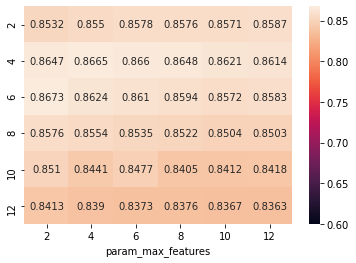

In [61]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".4g", vmin=0.6)

In [62]:
grid.best_params_

{'max_depth': 4, 'max_features': 2, 'n_estimators': 100}

In [63]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
RandomForestClassifier(max_depth=4, max_features=2)


In [64]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.6f}'.format(grid.__class__.__name__, accuracy))

Accuracy score of the GridSearchCV is 0.924513


In [65]:
from sklearn.metrics import roc_auc_score
y_proba_grid = grid.fit(X_train, y_train).predict_proba(X_test)

y_score_grid = grid.predict_proba(X_test)
roc_auc_score(y_test, y_proba_grid[:,1])

0.9034090909090909

### Gradient Booster Classifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier().fit(X_train, y_train)

In [67]:
gbrt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [68]:
gbrt.score(X_test, y_test)

0.8611111111111112

In [69]:
np.set_printoptions(precision=6, suppress=True)
param_grid = {'learning_rate': np.logspace(-2, 2, 5),
              'n_estimators': [5,10,50,100,200,500]}
param_grid

{'learning_rate': array([  0.01,   0.1 ,   1.  ,  10.  , 100.  ]),
 'n_estimators': [5, 10, 50, 100, 200, 500]}

In [70]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(gbrt, param_grid=param_grid, cv=5, return_train_score=True, n_jobs=-1,scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([  0.01,   0.1 ,   1.  ,  10.  , 100.  ]),
                         'n_estimators': [5, 10, 50, 100, 200, 500]},
             return_train_score=True, scoring='roc_auc')

In [71]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012526,0.002231,0.005405,0.002853,0.01,5,"{'learning_rate': 0.01, 'n_estimators': 5}",0.769133,0.879489,0.854818,...,0.831688,0.037265,13,0.894310,0.872369,0.868345,0.868433,0.878219,0.876335,0.009682
1,0.020144,0.005488,0.005084,0.001066,0.01,10,"{'learning_rate': 0.01, 'n_estimators': 10}",0.769133,0.876776,0.854818,...,0.836467,0.036233,12,0.894310,0.877583,0.868345,0.871194,0.878219,0.877930,0.009009
2,0.081140,0.007026,0.005602,0.001203,0.01,50,"{'learning_rate': 0.01, 'n_estimators': 50}",0.796046,0.872384,0.870189,...,0.847119,0.027761,9,0.904748,0.881655,0.874920,0.878155,0.892857,0.886467,0.010960
3,0.145576,0.002996,0.005074,0.000737,0.01,100,"{'learning_rate': 0.01, 'n_estimators': 100}",0.797959,0.863601,0.878455,...,0.854064,0.029777,5,0.908389,0.901540,0.885647,0.887634,0.894877,0.895618,0.008508
4,0.625369,0.292809,0.082624,0.153938,0.01,200,"{'learning_rate': 0.01, 'n_estimators': 200}",0.798980,0.864634,0.878972,...,0.852330,0.032355,6,0.917875,0.908397,0.899762,0.897428,0.908091,0.906310,0.007253
5,1.343261,0.427252,0.012769,0.011711,0.01,500,"{'learning_rate': 0.01, 'n_estimators': 500}",0.810077,0.869930,0.894213,...,0.864676,0.038277,2,0.947591,0.942188,0.934905,0.934526,0.941069,0.940056,0.004888
6,0.031049,0.030260,0.006989,0.002845,0.1,5,"{'learning_rate': 0.1, 'n_estimators': 5}",0.797066,0.873676,0.870189,...,0.847478,0.027669,8,0.903844,0.878501,0.874968,0.875290,0.892060,0.884933,0.011332
7,0.087313,0.029639,0.017316,0.014678,0.1,10,"{'learning_rate': 0.1, 'n_estimators': 10}",0.798980,0.863989,0.865280,...,0.849230,0.025547,7,0.907106,0.897678,0.885582,0.880963,0.894941,0.893254,0.009211
8,0.183448,0.059484,0.006265,0.001976,0.1,50,"{'learning_rate': 0.1, 'n_estimators': 50}",0.824107,0.867476,0.898476,...,0.867947,0.035562,1,0.947793,0.940795,0.933175,0.934036,0.940876,0.939335,0.005331
9,0.266278,0.031006,0.005015,0.000958,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.804337,0.871609,0.865797,...,0.855597,0.037362,3,0.975983,0.965098,0.967126,0.965686,0.964398,0.967659,0.004258


In [72]:
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_learning_rate', columns='param_n_estimators')
pd.set_option("display.precision",6)
res = res.set_index(res.index.values.round(6))
res

param_n_estimators,5,10,50,100,200,500
0.01,0.831688,0.836467,0.847119,0.854064,0.852330,0.864676
0.10,0.847478,0.849230,0.867947,0.855597,0.839997,0.820083
1.00,0.854407,0.841876,0.812811,0.817274,0.814616,0.814607
10.00,0.579071,0.579071,0.576978,0.576978,0.579045,0.579071
100.00,0.217278,0.217278,0.217278,0.217278,0.217278,0.217278


<AxesSubplot:xlabel='param_n_estimators'>

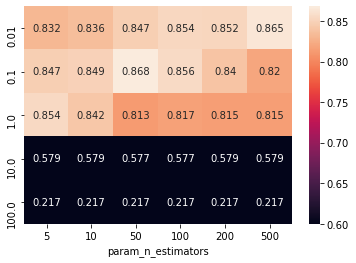

In [73]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

In [74]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [75]:
print("Best estimator:\n{}".format(grid.best_estimator_))
print("Best n_estimators:\n{}".format(grid.best_estimator_.n_estimators))

Best estimator:
GradientBoostingClassifier(n_estimators=50)
Best n_estimators:
50


In [76]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.6f}'.format(grid.__class__.__name__, accuracy))

Accuracy score of the GridSearchCV is 0.907468


In [77]:
from sklearn.metrics import roc_auc_score
y_proba_grid = grid.fit(X_train, y_train).predict_proba(X_test)

y_score_grid = grid.predict_proba(X_test)
roc_auc_score(y_test, y_proba_grid[:,1])

0.9074675324675325

### XGBoost

In [78]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print("accuracy on training set: %f" % xgb.score(X_train, y_train))
print("accuracy on test set: %f" % xgb.score(X_test, y_test))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

accuracy on training set: 0.976599
accuracy on test set: 0.847222


In [79]:
from sklearn.metrics import roc_auc_score
y_proba_xgb = xgb.fit(X_train, y_train).predict_proba(X_test)

y_score_xgb = xgb.predict_proba(X_test)
roc_auc_score(y_test, y_proba_xgb[:,1])

0.900974025974026

### LightGBM

In [80]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
print("accuracy on training set: %f" % lgbm.score(X_train, y_train))
print("accuracy on test set: %f" % lgbm.score(X_test, y_test))

LGBMClassifier()

accuracy on training set: 0.937598
accuracy on test set: 0.833333


In [81]:
from sklearn.metrics import roc_auc_score
y_proba_lgbm = lgbm.fit(X_train, y_train).predict_proba(X_test)

y_score_lgbm = lgbm.predict_proba(X_test)
roc_auc_score(y_test, y_proba_lgbm[:,1])

0.8879870129870131

### CatBoost

In [82]:
from catboost import CatBoostClassifier
catb = CatBoostClassifier()
catb.fit(X_train, y_train)
print("accuracy on training set: %f" % catb.score(X_train, y_train))
print("accuracy on test set: %f" % catb.score(X_test, y_test))

Learning rate set to 0.00852
0:	learn: 0.6875747	total: 51.1ms	remaining: 51.1s
1:	learn: 0.6814370	total: 52.3ms	remaining: 26.1s
2:	learn: 0.6753763	total: 53.6ms	remaining: 17.8s
3:	learn: 0.6695737	total: 54.5ms	remaining: 13.6s
4:	learn: 0.6642838	total: 55.9ms	remaining: 11.1s
5:	learn: 0.6590206	total: 57ms	remaining: 9.45s
6:	learn: 0.6539842	total: 60ms	remaining: 8.51s
7:	learn: 0.6492135	total: 61ms	remaining: 7.57s
8:	learn: 0.6440884	total: 62.5ms	remaining: 6.89s
9:	learn: 0.6395439	total: 64.6ms	remaining: 6.4s
10:	learn: 0.6342930	total: 66.1ms	remaining: 5.95s
11:	learn: 0.6301833	total: 67ms	remaining: 5.51s
12:	learn: 0.6255989	total: 67.9ms	remaining: 5.16s
13:	learn: 0.6205860	total: 69ms	remaining: 4.86s
14:	learn: 0.6158210	total: 70ms	remaining: 4.59s
15:	learn: 0.6114669	total: 71.2ms	remaining: 4.38s
16:	learn: 0.6065127	total: 73.8ms	remaining: 4.27s
17:	learn: 0.6022482	total: 74.6ms	remaining: 4.07s
18:	learn: 0.5977824	total: 75.7ms	remaining: 3.91s
19:	le

314:	learn: 0.3438319	total: 355ms	remaining: 773ms
315:	learn: 0.3437370	total: 357ms	remaining: 772ms
316:	learn: 0.3435836	total: 358ms	remaining: 771ms
317:	learn: 0.3434436	total: 359ms	remaining: 770ms
318:	learn: 0.3432876	total: 360ms	remaining: 768ms
319:	learn: 0.3431470	total: 361ms	remaining: 766ms
320:	learn: 0.3430597	total: 361ms	remaining: 764ms
321:	learn: 0.3428372	total: 362ms	remaining: 763ms
322:	learn: 0.3426483	total: 363ms	remaining: 761ms
323:	learn: 0.3425571	total: 364ms	remaining: 759ms
324:	learn: 0.3424741	total: 365ms	remaining: 758ms
325:	learn: 0.3422355	total: 366ms	remaining: 756ms
326:	learn: 0.3420581	total: 367ms	remaining: 755ms
327:	learn: 0.3418880	total: 368ms	remaining: 754ms
328:	learn: 0.3416962	total: 369ms	remaining: 752ms
329:	learn: 0.3415992	total: 370ms	remaining: 751ms
330:	learn: 0.3414674	total: 371ms	remaining: 749ms
331:	learn: 0.3413791	total: 371ms	remaining: 747ms
332:	learn: 0.3411476	total: 372ms	remaining: 746ms
333:	learn: 

496:	learn: 0.3182410	total: 531ms	remaining: 538ms
497:	learn: 0.3181202	total: 533ms	remaining: 537ms
498:	learn: 0.3179931	total: 534ms	remaining: 536ms
499:	learn: 0.3178125	total: 535ms	remaining: 535ms
500:	learn: 0.3177475	total: 536ms	remaining: 534ms
501:	learn: 0.3176434	total: 537ms	remaining: 533ms
502:	learn: 0.3174965	total: 538ms	remaining: 532ms
503:	learn: 0.3173741	total: 555ms	remaining: 547ms
504:	learn: 0.3172505	total: 557ms	remaining: 546ms
505:	learn: 0.3171578	total: 559ms	remaining: 546ms
506:	learn: 0.3170413	total: 560ms	remaining: 545ms
507:	learn: 0.3167679	total: 564ms	remaining: 546ms
508:	learn: 0.3164970	total: 565ms	remaining: 545ms
509:	learn: 0.3162970	total: 568ms	remaining: 545ms
510:	learn: 0.3162019	total: 576ms	remaining: 551ms
511:	learn: 0.3160071	total: 578ms	remaining: 551ms
512:	learn: 0.3158648	total: 579ms	remaining: 550ms
513:	learn: 0.3158420	total: 581ms	remaining: 549ms
514:	learn: 0.3157639	total: 582ms	remaining: 548ms
515:	learn: 

706:	learn: 0.2944984	total: 861ms	remaining: 357ms
707:	learn: 0.2944469	total: 863ms	remaining: 356ms
708:	learn: 0.2941760	total: 865ms	remaining: 355ms
709:	learn: 0.2940535	total: 866ms	remaining: 354ms
710:	learn: 0.2939941	total: 867ms	remaining: 353ms
711:	learn: 0.2938505	total: 869ms	remaining: 351ms
712:	learn: 0.2937980	total: 871ms	remaining: 351ms
713:	learn: 0.2936752	total: 872ms	remaining: 349ms
714:	learn: 0.2935310	total: 873ms	remaining: 348ms
715:	learn: 0.2934002	total: 875ms	remaining: 347ms
716:	learn: 0.2932289	total: 876ms	remaining: 346ms
717:	learn: 0.2931412	total: 878ms	remaining: 345ms
718:	learn: 0.2929985	total: 879ms	remaining: 344ms
719:	learn: 0.2929052	total: 881ms	remaining: 343ms
720:	learn: 0.2927937	total: 883ms	remaining: 341ms
721:	learn: 0.2926995	total: 883ms	remaining: 340ms
722:	learn: 0.2926360	total: 884ms	remaining: 339ms
723:	learn: 0.2925922	total: 886ms	remaining: 338ms
724:	learn: 0.2925557	total: 888ms	remaining: 337ms
725:	learn: 

940:	learn: 0.2715979	total: 1.2s	remaining: 75.4ms
941:	learn: 0.2715781	total: 1.2s	remaining: 74.2ms
942:	learn: 0.2715158	total: 1.21s	remaining: 72.9ms
943:	learn: 0.2714916	total: 1.21s	remaining: 71.6ms
944:	learn: 0.2714571	total: 1.21s	remaining: 70.3ms
945:	learn: 0.2714061	total: 1.21s	remaining: 69ms
946:	learn: 0.2713540	total: 1.21s	remaining: 67.7ms
947:	learn: 0.2712536	total: 1.21s	remaining: 66.5ms
948:	learn: 0.2712232	total: 1.21s	remaining: 65.2ms
949:	learn: 0.2710426	total: 1.21s	remaining: 63.9ms
950:	learn: 0.2708540	total: 1.21s	remaining: 62.6ms
951:	learn: 0.2707628	total: 1.22s	remaining: 61.3ms
952:	learn: 0.2706989	total: 1.22s	remaining: 60ms
953:	learn: 0.2706531	total: 1.22s	remaining: 58.7ms
954:	learn: 0.2705588	total: 1.22s	remaining: 57.4ms
955:	learn: 0.2704370	total: 1.22s	remaining: 56.1ms
956:	learn: 0.2703572	total: 1.22s	remaining: 54.8ms
957:	learn: 0.2703161	total: 1.22s	remaining: 53.6ms
958:	learn: 0.2702088	total: 1.22s	remaining: 52.3ms

accuracy on training set: 0.917317
accuracy on test set: 0.833333


In [83]:
from sklearn.metrics import roc_auc_score
y_proba_catb = catb.fit(X_train, y_train).predict_proba(X_test)

y_score_catb = catb.predict_proba(X_test)
roc_auc_score(y_test, y_proba_catb[:,1])

Learning rate set to 0.00852
0:	learn: 0.6875747	total: 1.27ms	remaining: 1.27s
1:	learn: 0.6814370	total: 3.9ms	remaining: 1.94s
2:	learn: 0.6753763	total: 6.6ms	remaining: 2.19s
3:	learn: 0.6695737	total: 8.18ms	remaining: 2.04s
4:	learn: 0.6642838	total: 10.1ms	remaining: 2.02s
5:	learn: 0.6590206	total: 13.8ms	remaining: 2.28s
6:	learn: 0.6539842	total: 15.4ms	remaining: 2.19s
7:	learn: 0.6492135	total: 17.8ms	remaining: 2.2s
8:	learn: 0.6440884	total: 40.2ms	remaining: 4.43s
9:	learn: 0.6395439	total: 41.7ms	remaining: 4.12s
10:	learn: 0.6342930	total: 51.9ms	remaining: 4.67s
11:	learn: 0.6301833	total: 53.5ms	remaining: 4.41s
12:	learn: 0.6255989	total: 56.6ms	remaining: 4.3s
13:	learn: 0.6205860	total: 62.4ms	remaining: 4.39s
14:	learn: 0.6158210	total: 63.8ms	remaining: 4.19s
15:	learn: 0.6114669	total: 65.1ms	remaining: 4s
16:	learn: 0.6065127	total: 66.4ms	remaining: 3.84s
17:	learn: 0.6022482	total: 67.3ms	remaining: 3.67s
18:	learn: 0.5977824	total: 68ms	remaining: 3.51s
19

183:	learn: 0.3785108	total: 493ms	remaining: 2.19s
184:	learn: 0.3780186	total: 494ms	remaining: 2.18s
185:	learn: 0.3773687	total: 495ms	remaining: 2.17s
186:	learn: 0.3769502	total: 496ms	remaining: 2.16s
187:	learn: 0.3764841	total: 497ms	remaining: 2.15s
188:	learn: 0.3761279	total: 498ms	remaining: 2.14s
189:	learn: 0.3756199	total: 499ms	remaining: 2.13s
190:	learn: 0.3751661	total: 500ms	remaining: 2.12s
191:	learn: 0.3746943	total: 501ms	remaining: 2.11s
192:	learn: 0.3741687	total: 503ms	remaining: 2.1s
193:	learn: 0.3738689	total: 503ms	remaining: 2.09s
194:	learn: 0.3734400	total: 504ms	remaining: 2.08s
195:	learn: 0.3728774	total: 505ms	remaining: 2.07s
196:	learn: 0.3725082	total: 506ms	remaining: 2.06s
197:	learn: 0.3720483	total: 507ms	remaining: 2.05s
198:	learn: 0.3718894	total: 507ms	remaining: 2.04s
199:	learn: 0.3715452	total: 509ms	remaining: 2.03s
200:	learn: 0.3712916	total: 510ms	remaining: 2.03s
201:	learn: 0.3709503	total: 512ms	remaining: 2.02s
202:	learn: 0

358:	learn: 0.3369019	total: 669ms	remaining: 1.19s
359:	learn: 0.3366290	total: 671ms	remaining: 1.19s
360:	learn: 0.3364683	total: 672ms	remaining: 1.19s
361:	learn: 0.3363662	total: 673ms	remaining: 1.19s
362:	learn: 0.3362021	total: 674ms	remaining: 1.18s
363:	learn: 0.3359467	total: 675ms	remaining: 1.18s
364:	learn: 0.3357953	total: 676ms	remaining: 1.18s
365:	learn: 0.3356240	total: 677ms	remaining: 1.17s
366:	learn: 0.3354564	total: 678ms	remaining: 1.17s
367:	learn: 0.3353949	total: 679ms	remaining: 1.17s
368:	learn: 0.3352954	total: 680ms	remaining: 1.16s
369:	learn: 0.3351677	total: 681ms	remaining: 1.16s
370:	learn: 0.3349329	total: 682ms	remaining: 1.16s
371:	learn: 0.3348186	total: 683ms	remaining: 1.15s
372:	learn: 0.3346789	total: 684ms	remaining: 1.15s
373:	learn: 0.3345371	total: 685ms	remaining: 1.15s
374:	learn: 0.3344303	total: 686ms	remaining: 1.14s
375:	learn: 0.3342562	total: 688ms	remaining: 1.14s
376:	learn: 0.3340322	total: 689ms	remaining: 1.14s
377:	learn: 

517:	learn: 0.3152900	total: 836ms	remaining: 777ms
518:	learn: 0.3152551	total: 837ms	remaining: 775ms
519:	learn: 0.3151350	total: 838ms	remaining: 774ms
520:	learn: 0.3150556	total: 840ms	remaining: 773ms
521:	learn: 0.3149497	total: 842ms	remaining: 771ms
522:	learn: 0.3148995	total: 843ms	remaining: 768ms
523:	learn: 0.3147521	total: 844ms	remaining: 766ms
524:	learn: 0.3145485	total: 845ms	remaining: 764ms
525:	learn: 0.3144126	total: 846ms	remaining: 762ms
526:	learn: 0.3142586	total: 846ms	remaining: 760ms
527:	learn: 0.3141626	total: 847ms	remaining: 758ms
528:	learn: 0.3140654	total: 848ms	remaining: 755ms
529:	learn: 0.3138566	total: 850ms	remaining: 754ms
530:	learn: 0.3137642	total: 853ms	remaining: 753ms
531:	learn: 0.3136611	total: 854ms	remaining: 751ms
532:	learn: 0.3135978	total: 855ms	remaining: 749ms
533:	learn: 0.3134963	total: 856ms	remaining: 747ms
534:	learn: 0.3133436	total: 857ms	remaining: 745ms
535:	learn: 0.3132494	total: 857ms	remaining: 742ms
536:	learn: 

844:	learn: 0.2806543	total: 1.19s	remaining: 218ms
845:	learn: 0.2805797	total: 1.19s	remaining: 217ms
846:	learn: 0.2805757	total: 1.19s	remaining: 215ms
847:	learn: 0.2805558	total: 1.19s	remaining: 214ms
848:	learn: 0.2804940	total: 1.19s	remaining: 212ms
849:	learn: 0.2804655	total: 1.19s	remaining: 211ms
850:	learn: 0.2804013	total: 1.2s	remaining: 209ms
851:	learn: 0.2801434	total: 1.2s	remaining: 208ms
852:	learn: 0.2800694	total: 1.2s	remaining: 206ms
853:	learn: 0.2800030	total: 1.2s	remaining: 205ms
854:	learn: 0.2798998	total: 1.2s	remaining: 203ms
855:	learn: 0.2798406	total: 1.2s	remaining: 202ms
856:	learn: 0.2797594	total: 1.2s	remaining: 200ms
857:	learn: 0.2796927	total: 1.2s	remaining: 199ms
858:	learn: 0.2795133	total: 1.2s	remaining: 198ms
859:	learn: 0.2794595	total: 1.2s	remaining: 196ms
860:	learn: 0.2793477	total: 1.21s	remaining: 195ms
861:	learn: 0.2792768	total: 1.21s	remaining: 193ms
862:	learn: 0.2791365	total: 1.21s	remaining: 192ms
863:	learn: 0.2790436	

0.9017857142857142

### Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score

In [85]:
gnb = GaussianNB()

In [86]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [87]:
gnb.fit(X_train, y_train)

GaussianNB()

In [88]:
gnb.score(X_train,y_train)
gnb.score(X_test,y_test)

0.7753510140405616

0.8611111111111112

In [89]:
from sklearn.metrics import roc_auc_score
y_proba_gnb = gnb.fit(X_train, y_train).predict_proba(X_test)

y_score_gnb = gnb.predict_proba(X_test)
roc_auc_score(y_test, y_proba_gnb[:,1])

0.9415584415584416

In [90]:
from sklearn.naive_bayes import MultinomialNB

In [91]:
mnb = MultinomialNB()

In [92]:
mnb.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [93]:
np.set_printoptions(precision=6, suppress=True)
param_grid = {'alpha': [0.0001,0.001,0.01,0.1,1,10]}
param_grid

{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

In [94]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(mnb, param_grid=param_grid, cv=5, return_train_score=True, n_jobs=-1,scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True, scoring='roc_auc')

In [95]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004207,0.001502,0.004649,0.000874,0.0001,{'alpha': 0.0001},0.729209,0.742444,0.776802,0.768794,...,0.756692,0.017887,2,0.769932,0.759094,0.751811,0.756406,0.759713,0.759391,0.005961
1,0.007157,0.005615,0.005291,0.001996,0.001,{'alpha': 0.001},0.729209,0.742444,0.776802,0.768794,...,0.756692,0.017887,2,0.769932,0.759029,0.751811,0.756406,0.759713,0.759378,0.005962
2,0.007697,0.003677,0.004016,0.000223,0.01,{'alpha': 0.01},0.729209,0.742702,0.776802,0.768794,...,0.756743,0.017846,1,0.769867,0.758997,0.751795,0.756406,0.759713,0.759356,0.005943
3,0.004790,0.000809,0.005320,0.000865,0.1,{'alpha': 0.1},0.729209,0.741669,0.776802,0.769052,...,0.756588,0.018048,4,0.769819,0.758836,0.751634,0.756374,0.759729,0.759278,0.005973
4,0.005090,0.001067,0.004995,0.001395,1,{'alpha': 1},0.727679,0.740377,0.776544,0.770860,...,0.756386,0.018963,5,0.769012,0.758208,0.750765,0.756036,0.759166,0.758637,0.005947
5,0.006239,0.002045,0.003694,0.000664,10,{'alpha': 10},0.723597,0.734436,0.772669,0.768019,...,0.752521,0.019692,6,0.764313,0.753364,0.746194,0.752446,0.754305,0.754124,0.005833


In [96]:
grid.best_params_

{'alpha': 0.01}

In [97]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
MultinomialNB(alpha=0.01)


In [98]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.6f}'.format(grid.__class__.__name__, accuracy))

Accuracy score of the GridSearchCV is 0.755682


In [99]:
from sklearn.metrics import roc_auc_score
y_proba_grid = grid.fit(X_train, y_train).predict_proba(X_test)

y_score_grid = grid.predict_proba(X_test)
roc_auc_score(y_test, y_proba_grid[:,1])

0.7556818181818181

In [100]:
from sklearn.naive_bayes import BernoulliNB

In [101]:
bnb = BernoulliNB()

In [102]:
bnb.get_params()

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

In [103]:
np.set_printoptions(precision=6, suppress=True)
param_grid = {'alpha': [0.0001,0.001,0.01,0.1,1,10]}
param_grid

{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

In [104]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(bnb, param_grid=param_grid, cv=5, return_train_score=True, n_jobs=-1,scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True, scoring='roc_auc')

In [105]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007299,0.001755,0.009827,0.008190,0.0001,{'alpha': 0.0001},0.804719,0.839706,0.854560,0.885430,...,0.845367,0.026010,6,0.860372,0.851292,0.853457,0.839519,0.855743,0.852077,0.006964
1,0.006513,0.001157,0.007907,0.006683,0.001,{'alpha': 0.001},0.804719,0.848747,0.854560,0.885430,...,0.847175,0.025867,4,0.860372,0.851019,0.853457,0.839519,0.855743,0.852022,0.006971
2,0.009944,0.004172,0.005771,0.001884,0.01,{'alpha': 0.01},0.804719,0.851589,0.854301,0.885430,...,0.847691,0.025913,2,0.860275,0.850713,0.853425,0.839519,0.855743,0.851935,0.006956
3,0.007330,0.002217,0.005729,0.002534,0.1,{'alpha': 0.1},0.804719,0.853139,0.854301,0.885172,...,0.847950,0.025893,1,0.860275,0.850327,0.853200,0.839229,0.855147,0.851636,0.007001
4,0.005005,0.000217,0.004755,0.000686,1,{'alpha': 1},0.804719,0.854430,0.853526,0.883363,...,0.847278,0.025501,3,0.859758,0.847703,0.851542,0.839149,0.853972,0.850425,0.006863
5,0.019447,0.016205,0.005545,0.002359,10,{'alpha': 10},0.803189,0.854430,0.853010,0.883105,...,0.846404,0.026033,5,0.858305,0.849313,0.850319,0.836896,0.851027,0.849172,0.006912


In [106]:
grid.best_params_

{'alpha': 0.1}

In [107]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
BernoulliNB(alpha=0.1)


In [108]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.6f}'.format(grid.__class__.__name__, accuracy))

Accuracy score of the GridSearchCV is 0.927354


In [109]:
from sklearn.metrics import roc_auc_score
y_proba_grid = grid.fit(X_train, y_train).predict_proba(X_test)

y_score_grid = grid.predict_proba(X_test)
roc_auc_score(y_test, y_proba_grid[:,1])

0.9273538961038961

### Neural Network

In [122]:
from sklearn.neural_network import MLPClassifier

In [123]:
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,\
                           activation = 'relu',solver='adam',random_state=0)

In [124]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (150, 100, 50),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 300,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [125]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=0)

In [126]:
mlp.score(X_test, y_test)

0.8194444444444444

In [127]:
np.set_printoptions(precision=6, suppress=True)
param_grid = {
    'hidden_layer_sizes': [(5,5,),(10,10),(5,5,5),(10,10,10),(5,5,5,5),(10,10,10,10),(5,5,5,5,5),(10,10,10,10,10),(50,50,50), (50,100,50), (100,),(150, 100, 50)],
    'activation': ['tanh', 'relu','sigmoid'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001,0.01,0.05,0.10],
    'learning_rate': ['constant','adaptive'],
}
param_grid

{'hidden_layer_sizes': [(5, 5),
  (10, 10),
  (5, 5, 5),
  (10, 10, 10),
  (5, 5, 5, 5),
  (10, 10, 10, 10),
  (5, 5, 5, 5, 5),
  (10, 10, 10, 10, 10),
  (50, 50, 50),
  (50, 100, 50),
  (100,),
  (150, 100, 50)],
 'activation': ['tanh', 'relu', 'sigmoid'],
 'solver': ['sgd', 'adam'],
 'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1],
 'learning_rate': ['constant', 'adaptive']}

In [128]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(mlp, param_grid=param_grid, cv=5, return_train_score=True, n_jobs=-1,scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(150, 100, 50),
                                     max_iter=300, random_state=0),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'sigmoid'],
                         'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1],
                         'hidden_layer_sizes': [(5, 5), (10, 10), (5, 5, 5),
                                                (10, 10, 10), (5, 5, 5, 5),
                                                (10, 10, 10, 10),
                                                (5, 5, 5, 5, 5),
                                                (10, 10, 10, 10, 10),
                                                (50, 50, 50), (50, 100, 50),
                                                (100,), (150, 100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             return_train_score=True, scoring='roc_auc')

In [129]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_solver,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.774444,0.034170,0.005344,0.001399,tanh,0.0001,"(5, 5)",constant,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",...,0.839893,0.019377,300,0.861502,0.854986,0.859412,0.840453,0.844517,0.852174,0.008287
1,0.802919,0.046228,0.006754,0.003760,tanh,0.0001,"(5, 5)",constant,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",...,0.865482,0.026028,31,0.898686,0.896092,0.889896,0.883812,0.894459,0.892589,0.005239
2,0.703096,0.058567,0.005537,0.000658,tanh,0.0001,"(5, 5)",adaptive,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",...,0.839893,0.019377,300,0.861502,0.854986,0.859412,0.840453,0.844517,0.852174,0.008287
3,1.024345,0.110148,0.004944,0.000877,tanh,0.0001,"(5, 5)",adaptive,adam,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",...,0.865482,0.026028,31,0.898686,0.896092,0.889896,0.883812,0.894459,0.892589,0.005239
4,0.992920,0.055644,0.007819,0.002519,tanh,0.0001,"(10, 10)",constant,sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",...,0.745179,0.036491,441,0.762868,0.751497,0.741051,0.741631,0.767889,0.752987,0.010894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.001779,0.000530,0.000000,0.000000,sigmoid,0.1,"(100,)",adaptive,adam,"{'activation': 'sigmoid', 'alpha': 0.1, 'hidde...",...,NaN,NaN,563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
716,0.001431,0.000238,0.000000,0.000000,sigmoid,0.1,"(150, 100, 50)",constant,sgd,"{'activation': 'sigmoid', 'alpha': 0.1, 'hidde...",...,NaN,NaN,564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
717,0.001026,0.000139,0.000000,0.000000,sigmoid,0.1,"(150, 100, 50)",constant,adam,"{'activation': 'sigmoid', 'alpha': 0.1, 'hidde...",...,NaN,NaN,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
718,0.001577,0.000206,0.000000,0.000000,sigmoid,0.1,"(150, 100, 50)",adaptive,sgd,"{'activation': 'sigmoid', 'alpha': 0.1, 'hidde...",...,NaN,NaN,632,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
grid.best_params_

{'activation': 'relu',
 'alpha': 0.001,
 'hidden_layer_sizes': (10, 10),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [131]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
MLPClassifier(alpha=0.001, hidden_layer_sizes=(10, 10), max_iter=300,
              random_state=0)


In [132]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.6f}'.format(grid.__class__.__name__, accuracy))

Accuracy score of the GridSearchCV is 0.865260


In [133]:
from sklearn.metrics import roc_auc_score
y_proba_grid = grid.fit(X_train, y_train).predict_proba(X_test)

y_score_grid = grid.predict_proba(X_test)
roc_auc_score(y_test, y_proba_grid[:,1])

0.8652597402597402